# Sprint 機械学習スクラッチ 線形回帰

線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。

### ScratchLinearRegressionクラス 雛形

In [22]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        pass
        return

## 【問題1】仮定関数

以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。  
$
hθ(x)=θ0x0+θ1x1+...+θjxj+...+θnxn.(x0=1)
$  

x : 特徴量ベクトル  
θ : パラメータベクトル  
n : 特徴量の数  
xj : j番目の特徴量  
θj : j番目のパラメータ（重み）  

特徴量の数nは任意の値に対応できる実装にしてください。


なお、ベクトル形式で表すと以下のようになります。  
$hθ(x)=θT⋅x.$

### 仮定関数

In [10]:
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        # h = np.dot(theta, X.T)
        h = np.dot(self.coef_, X.T)
        return h

## 【問題2】最急降下法

最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

In [34]:
    def _gradient_descent(self, X, error):
        """
        最急降下法による学習
        """
        # alpha = self.lr
        # theta = np.array([1,2,3])
        m = len(X)
        # print(theta)
        self.coef_ = self.coef_ - self.lr * (1/m)*np.dot( error, X)
        # theta = ( theta,X).sum()

        return self.coef_

## 【問題3】推定

推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。


仮定関数 $h_\theta(x)$ の出力が推定結果です。

In [ ]:
    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        y_pred = linear_hypothesis(X)
        return y_pred

## 【問題4】平均二乗誤差

線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。

$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解値


なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

In [36]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    # print(y_pred)
    m = len(y) 
    mse = 1/m * ((y_pred - y)**2).sum()

    return mse

## 【問題5】目的関数

以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


目的関数（損失関数） $J(\theta)$ は次の式です。

$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解値


In [ ]:
def _ loss(self, verbose):
    if self.loss is == True:
        J = 1/2m * sum((ypred - y)**2)
    else self.val_loss is == True:
        J = 1/2m * sum((ypred - y)**2)
    
    return J

### 問題1〜5を反映したコード

In [50]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,) 
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        # self.coef_ = 10
        self.coef_ = None
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # print(X.shape)
        # if X_val is not None:
        #    print(X_val.shape)
        
        # バイアスの有無
        if self.no_bias is not True:
            X = np.insert(X, 0, 2, axis=1)
        if X_val is not None:
            X_val = np.insert(X_val, 0, 1, axis=1)
        # print(X)
        
        self.coef_ = np.random.rand(X.shape[1])
        
        for i in range(self.iter):

            y_pred = self._linear_hypothesis(X)
            error = y_pred - y
            self.coef_ = self._gradient_descent(X, error)
            m = len(y_pred)
            J = 1/2* ((error)**2).sum() / m
            self.loss[i] = J
            # print(self.loss)
            
            if self.verbose is True:
                #verboseをTrueにした際は学習過程を出力
                print("{}回目:{}".format(i, J))
            
            # X_valがある場合
            if X_val is not None:
                # print(X.shape, X_val.T.shape)
                y_pred_val = self._linear_hypothesis(X_val)
                error_val = y_pred_val - y_val
                val_m = len(y_pred_val)
                val_J = 1/2* ((error_val)**2).sum() / val_m
                self.val_loss[i] = val_J
                # print(self.val_loss)

                if self.verbose is True:
                #verboseをTrueにした際は学習過程を出力
                    # print("{}回目:{} - {}".format(i, val_J,self.coef_))
                    print("{}回目:{}".format(i, val_J))
                

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        y_pred = linear_hypothesis(X)
        return y_pred
    
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        # h = np.dot(theta, X.T)
        h = np.dot(self.coef_, X.T)
        return h

    def _gradient_descent(self, X, error):
        """
        最急降下法による学習
        """
        # alpha = self.lr
        # theta = np.array([1,2,3])
        m = len(X)
        # print(theta)
        self.coef_ = self.coef_ - self.lr * (1/m)*np.dot( error, X)
        # theta = ( theta,X).sum()

        return self.coef_


def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    # print(y_pred)
    m = len(y) # 不要かもしれない
    mse = 1/m * ((y_pred - y)**2).sum()

    return mse

## 【問題6】学習と推定

機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df_original = pd.read_csv("dataset/train.csv")
df = df_original[["GrLivArea", "YearBuilt", "SalePrice"]]

# 説明変数と目的変数に分割し、ndarrayに変換
X = df[["GrLivArea", "YearBuilt"]].values
y = df[["SalePrice"]].values

#データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

In [69]:
# 標準化処理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = np.log(y_train)
y_test = np.log(y_test)

In [70]:
#スクラッチによる推定
regress = ScratchLinearRegression(num_iter=100, lr=0.01, no_bias=False, verbose=False)
regress.fit(X_train, y_train.ravel(), X_test,  y_test.ravel())
#regress.fit(X_test,  y_test.ravel(), X_train, y_train.ravel())
MSE(y_pred_liner, y_train)

295.5162641646213

In [72]:
#scilit-learnによる推定
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(X_train, y_train.ravel())
y_pred_sl = model.predict(X_train)
MSE(y_pred_sl, y_train)

250.7933846903892

## 【問題7】学習曲線のプロット

学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。


線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください

In [74]:
def plot_learning_curve(loss, val_loss):

    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

    axL.plot(loss, c="b")
    axL.set_xlabel("Iteration")
    axL.set_ylabel("loss")
    axL.grid()

    axR.plot(val_loss, c="r")
    axR.set_xlabel("Iteration")
    axR.set_ylabel("loss")
    axR.grid()
    plt.show()

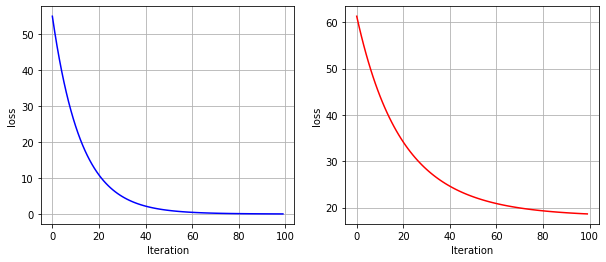

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_learning_curve(regress.loss, regress.val_loss)